<a href="https://colab.research.google.com/github/mgarbanzo/UCR_NOAA_2020/blob/main/Generando_producto_de_SO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

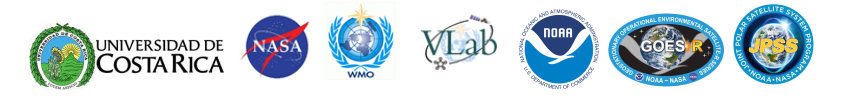

# Práctica de Python en la nube para generar el producto de $SO_2$ con datos del sensor ABI de GOES 16

## Entrenamiento Virtual en Aplicaciones de Satélites para la RA-IV de la OMM



# Recordatorio:

Existen casillas de Texto y de Código.

Puede agregar casillas utilizando los botones de arriba a la izquierda donde dice 

> \+ Código

y 

> \+ Texto

luego para ejecutar el código o dejar finalizar la edición de texto debe presionar

> Shift + Enter

sobre cada casilla individual.

---

Por cierto, el tipo de texto que se utiliza aquí es llamado **Markdown** y puede aprender más acerca de como utilizarlo [aquí en Inglés](https://www.markdownguide.org/basic-syntax/) o [aquí en Español](https://markdown.es/sintaxis-markdown/).





# Primero debemos obtener la información para visualizar.

El evento ocurrió el 3 de Junio del 2018 a las 22 UCT.

Los enlaces mostrados se obtuvieron de [este enlace](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2019-07-17&hour=12).

Note que se comienza con la instrucción !wget donde:

> el símbolo **!** indica que no es un comando de Python sino de GNU/Linux 

y 

> **wget** es un programa para descargar información de sitios web.

Descargamos los datos ejecutando las siguientes dos casillas de código:

In [3]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C09_G16_s20181542200486_e20181542211258_c20181542211347.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C10_G16_s20181542200486_e20181542211264_c20181542211343.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C11_G16_s20181542200486_e20181542211253_c20181542211341.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C13_G16_s20181542200486_e20181542211264_c20181542211346.nc

--2020-10-15 19:37:10--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C09_G16_s20181542200486_e20181542211258_c20181542211347.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.227.48
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.227.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19613262 (19M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M3C09_G16_s20181542200486_e20181542211258_c20181542211347.nc’

OR_ABI-L2-CMIPF-M3C 100%[===================>]  18.70M  48.2MB/s    in 0.4s    

2020-10-15 19:37:11 (48.2 MB/s) - ‘OR_ABI-L2-CMIPF-M3C09_G16_s20181542200486_e20181542211258_c20181542211347.nc’ saved [19613262/19613262]

--2020-10-15 19:37:11--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2018/154/22/OR_ABI-L2-CMIPF-M3C10_G16_s20181542200486_e20181542211264_c20181542211343.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 5

# Se requieren algunas librerías para poder leer datos satelitales

Una de las librerías más usadas para leer datos satelitales es **NetCDF4** que se instala con el siguiente comando:

In [4]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 3.4MB/s 
     |████████████████████████████████| 296kB 38.7MB/s 


Una vez instalada, se puede incorporar en Python junto a otras librería útiles para visualización y manipulación de arreglos de números:

In [7]:
import pylab as plt
from netCDF4 import Dataset                
import matplotlib.pyplot as plt           
import numpy as np                      
from datetime import datetime


# Asignar el metadato a los datos es simple y rápido

En la casilla siguiente se utiliza el comando Dataset de la librería NetCDF4 para cargar los metadatos a las variables.

Se está restando 273.15 a los valores para convertirlos de $K$ a $C$.



In [8]:
# Se abre la imagen del GOES-16 para obtener información
file1 = Dataset("/content/OR_ABI-L2-CMIPF-M3C09_G16_s20181542200486_e20181542211258_c20181542211347.nc")
# Se extraen los valores de cada punto y se convierten de K a C
data1 = file1.variables['CMI'][:,:][::1 ,::1] - 273.15

file2 = Dataset("/content/OR_ABI-L2-CMIPF-M3C10_G16_s20181542200486_e20181542211264_c20181542211343.nc")
data2 = file2.variables['CMI'][:,:][::1 ,::1] - 273.15

file3 = Dataset("/content/OR_ABI-L2-CMIPF-M3C13_G16_s20181542200486_e20181542211264_c20181542211346.nc")
data3 = file3.variables['CMI'][:,:][::1 ,::1] - 273.15

file4 = Dataset("/content/OR_ABI-L2-CMIPF-M3C11_G16_s20181542200486_e20181542211253_c20181542211341.nc")
data4 = file4.variables['CMI'][:,:][::1 ,::1] - 273.15

# Generación de los colores Rojo (R), Verge (G), y Azul (B)

Se necesitan tres canales para generar una imagenes tipo RGB

In [9]:
R = data1 - data2 # Canal 9 - Canal 10
G = data3 - data4 # Canal 13 - Canal 11
B = data3         # Canal 13

Se utilizan valores mínimo y máximo para delimitar las regiones de interés.

Este proceso por lo general es experimental para lograr un ajuste fino a las necesidades del producto.

Note que en este caso el color rojo (R) se calculó con la ecuación $$ R = CH_{9} - CH_{10} $$ pero se define $$ R_{min} = -4.0 C $$ y $$ R_{max} = 2.0 C $$

de manera que $$ -4.0 C < R < 2.0 C $$.

Similarmente se hace para el color verde y azul.

In [10]:
# Establecemos los límites de cada color:

Rmin = -4.0
Rmax = 2.0

Gmin = -4.0
Gmax = 5.0

Bmin = -30.01
Bmax = 29.80

R[R > Rmax] = Rmax
R[R < Rmin] = Rmin

G[G > Gmax] = Gmax
G[G < Gmin] = Gmin

B[B > Bmax] = Bmax
B[B < Bmin] = Bmin 

gamma_R = 1
gamma_G = 1
gamma_B = 1
 
# Se normalizan los datos
R = ((R - Rmin) / (Rmax - Rmin)) ** (1/gamma_R)
G = ((G - Gmin) / (Gmax - Gmin)) ** (1/gamma_G)
B = ((B - Bmin) / (Bmax - Bmin)) ** (1/gamma_B) 

Se genera la matriz de datos RGB que contiene las tres componentes de Rojo, Verde y Azul. También se crea una máscara para las regiones sin valores (espacio al rededor del planeta por ejemplo). 

In [11]:
# Create the RGB
RGB = np.stack([R, G, B], axis=2)

# Eliminate values outside the globe
mask = (RGB == [R[0,0],G[0,0],B[0,0]]).all(axis=2)
RGB[mask] = np.nan

# Graficación de los datos

Ahora procedemos a generar el producto de Ceniza

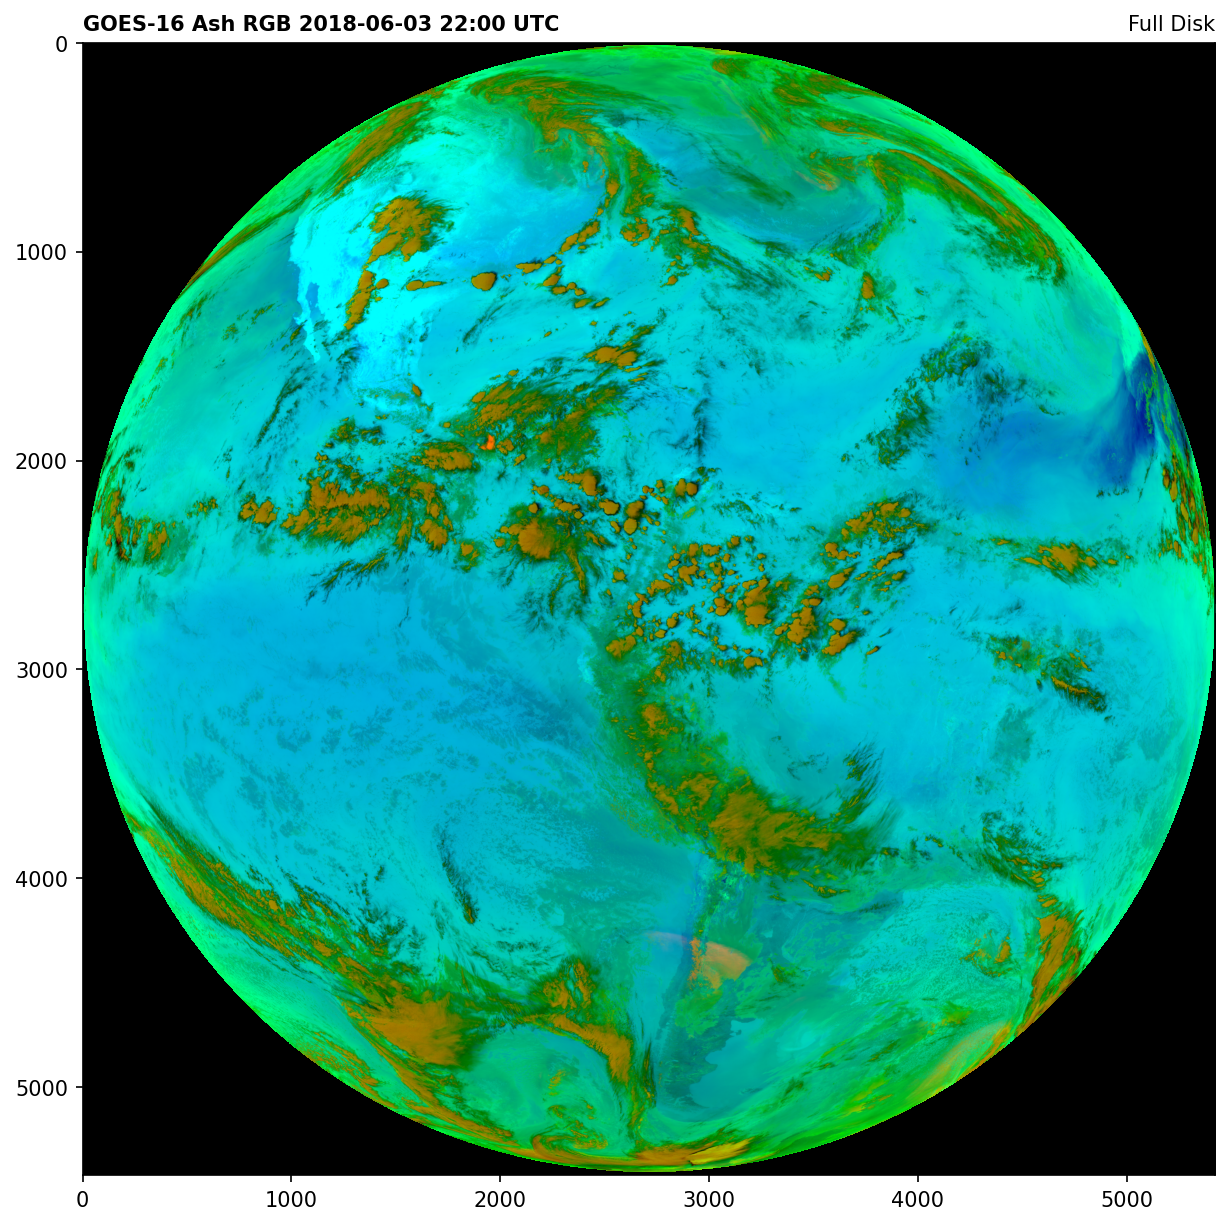

In [13]:
# Seleccionamos el tamaño y resolución de la imagen que necesitamos
plt.figure(figsize=(10,10),dpi=150) 
img = plt.imshow(RGB, origin='upper')

# Extraemos la fecha y hora de la imagen:
date = (datetime.strptime(file1.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Agregamos un título al producto
plt.title('GOES-16 Ash RGB ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# Guardamos una copia de la imagen al archivo llamado Imagen_SO2.png
plt.savefig('Imagen_SO2.png')

# Mostramos el producto generado
plt.show()

# Podemos recortar una sección más pequeña y usar otro motor de graficación

Tenemos que instalar la librería mpld3 para poder hacer zoom y mover facilmente la imagen.


In [14]:
!pip install mpld3

     |████████████████████████████████| 1.0MB 3.3MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=7a2a2e56f662935ba643d069259e3650921a52d3646c64a0980560f26e5789ae
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [18]:
import mpld3
from mpld3 import plugins

In [20]:
pRGB = RGB[1500:2500,1500:2500,:]

In [22]:
fig, ax = plt.subplots(figsize=(15,15))

im = ax.imshow(pRGB, origin='upper')

# Extract date
date = (datetime.strptime(file1.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
	
# Add a title
plt.title('GOES-16 Ash RGB ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')
plt.savefig('Imagen2_SO2.png')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()


In [ ]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy